In [ ]:
#pip install shap

In [ ]:
#pip install --upgrade numpy==2.0.0

In [2]:
from xgboost import XGBRegressor
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('../Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('../Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# Creating xgb model from optuna trial joblib files
trial = joblib.load('../Optuna/xgbModels/QACS_trial.joblib')
model = XGBRegressor(**trial.params)

# data split
x_train, x_test, y_train, y_test = train_test_split(X, Y['QACS'], test_size=trial.params['test_size'], random_state=0)

# model fitting
model.fit(x_train, y_train)

# compute the SHAP values
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(x_test)

# Plotting Waterfall Graph for Feature Contributions
sample_ind = 20
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

# F(X) is the predicted bonus for this specific sample (that one being the very last sample)
# E(F(X)) is the average predicted gene value across all samples for QACs

/home/mour/.local/lib/python3.12/site-packages/xgboost/core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


KeyError: 'QACs'

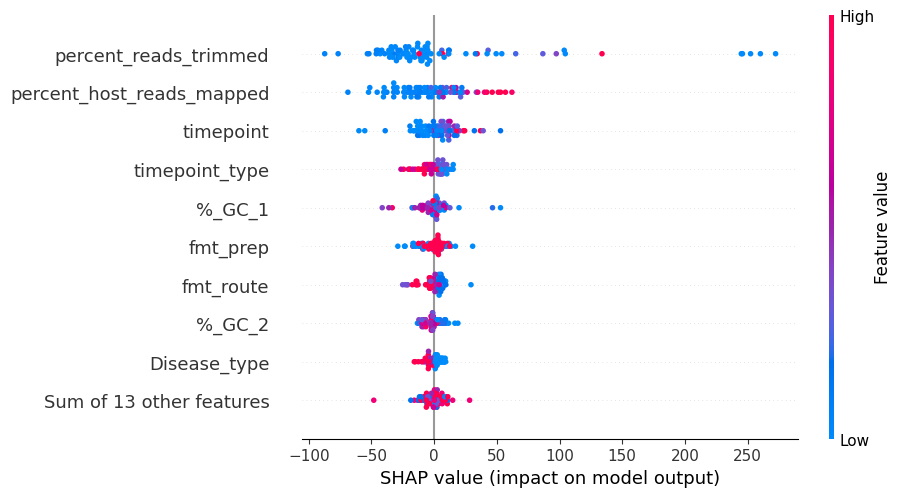

In [3]:
#shap summary plot plotting
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("shap_summary.png")
plt.show()